- Import Library

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import pandas as pd
from datasets import load_dataset
import preprocessor as p
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

- Pengambilan data sebanyak 500

In [2]:
df = pd.read_csv('review_hotel.csv')

df.head()

df = df.head(500)
df.iloc[0]['review']


' Extra bed was the worst breakfast queue was really terrible It s easy to tell people to come at a specific time though you have to arrange it somehow Parking is far away and hard to come back because of road diversions '

- Ukuran data

In [3]:
df.shape

(500, 3)

- Pengecekan nilai null 

In [4]:
df.isnull().sum()

review_date    0
hotel_name     0
review         0
dtype: int64

- Mengubah kalimat menjadi huruf kecil

In [5]:
df['review'] = df['review'].str.lower()

In [6]:
df.head()

review_date                     hotel_name  \
0    8/3/2017  Park Plaza County Hall London   
1    8/3/2017  Park Plaza County Hall London   
2    8/3/2017  Park Plaza County Hall London   
3    8/2/2017  Park Plaza County Hall London   
4    8/2/2017  Park Plaza County Hall London   

                                              review  
0   extra bed was the worst breakfast queue was r...  
1                         just the location and view  
2   around the corner from the london eye and use...  
3                   i wish you had wheat free snacks  
4   you re always my hotel of choice you re staff...

- Penghapusan preposisi, kata penghubung, kata ganti, dan kata-kata lain yang umumnya tidak memiliki makna khusus dalam suatu kalimat

In [7]:
# Stopword
stop_words = set(stopwords.words('english'))

def stopword_text(text):
    word_tokens = word_tokenize(text)
    filtered_review = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_review)
    
df['review'] = df['review'].apply(stopword_text)

In [8]:
df.head()

review_date                     hotel_name  \
0    8/3/2017  Park Plaza County Hall London   
1    8/3/2017  Park Plaza County Hall London   
2    8/3/2017  Park Plaza County Hall London   
3    8/2/2017  Park Plaza County Hall London   
4    8/2/2017  Park Plaza County Hall London   

                                              review  
0  extra bed worst breakfast queue really terribl...  
1                                      location view  
2  around corner london eye used trafalgar trip p...  
3                             wish wheat free snacks  
4  always hotel choice staff incredible recently ...

- Memecah teks menjadi potongan-potongan yang lebih kecil

In [9]:
# Tokenisasi
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

df['review'] = df['review'].apply(tokenize)

In [10]:
df.head()

review_date                     hotel_name  \
0    8/3/2017  Park Plaza County Hall London   
1    8/3/2017  Park Plaza County Hall London   
2    8/3/2017  Park Plaza County Hall London   
3    8/2/2017  Park Plaza County Hall London   
4    8/2/2017  Park Plaza County Hall London   

                                              review  
0  [extra, bed, worst, breakfast, queue, really, ...  
1                                   [location, view]  
2  [around, corner, london, eye, used, trafalgar,...  
3                        [wish, wheat, free, snacks]  
4  [always, hotel, choice, staff, incredible, rec...

- Mengubah kata menjadi bentuk dasar

In [11]:
# Stemming
def stemming_text(text):
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in text]
    return tokens
df['review'] = df['review'].apply(stemming_text)
df.head()

review_date                     hotel_name  \
0    8/3/2017  Park Plaza County Hall London   
1    8/3/2017  Park Plaza County Hall London   
2    8/3/2017  Park Plaza County Hall London   
3    8/2/2017  Park Plaza County Hall London   
4    8/2/2017  Park Plaza County Hall London   

                                              review  
0  [extra, bed, worst, breakfast, queue, realli, ...  
1                                      [locat, view]  
2  [around, corner, london, eye, use, trafalgar, ...  
3                         [wish, wheat, free, snack]  
4  [alway, hotel, choic, staff, incred, recent, g...

In [12]:
def stemming_text_category(list_word):
    stemmer = PorterStemmer()
    stemmed_word = [stemmer.stem(word) for word in list_word]
    return stemmed_word

kata_fasilitas_hotel = [
    "bed", "bathroom", "view", "spacious", "clean", "comfortable", "balcony", "TV", "desk", "closet",
    "atmosphere", "decor", "comfort", "service", "seating", "friendly", "receptionist", "WiFi", "front desk",
    "clean", "heated", "kids pool", "view", "towel", "scenery", "sunbathing", "outdoor", "relaxing",
    "equipment", "clean", "variety", "comfort", "trainer", "space", "towel", "water", "treadmill", "weights",
    "speed", "connection", "stable", "free", "access", "network", "easy", "available", "uninterrupted", "reliable",
    "cool", "consistent", "thermostat", "temperature", "functional", "air conditioner", "control", "chilly", "comfortable"
]

kata_makanan_hotel = [
    "restaurant", "food", "breakfast", "buffet", "snacks", "lunch", "dinner", "menu", "delicious", "tasty",
    "variety", "quality", "fresh", "taste", "flavor", "chef", "cuisine", "local", "international", "coffee",
    "tea", "beverage", "dessert", "pastry", "fruit", "vegetarian", "vegan", "gluten-free", "allergy-friendly"
]

kata_pelayanan_hotel = [
    "service", "staff", "check-in", "check-out","room", "room service", "reception", "friendly", "hospitality",
    "helpful", "efficient", "attentive", "courteous", "responsive", "accommodating", "professional", 
    "polite", "warm", "welcoming", "customer service", "concierge", "bellhop", "maid", "butler", "location"
]

faciliy_word = stemming_text_category(kata_fasilitas_hotel)
food_word = stemming_text_category(kata_makanan_hotel)
service_word = stemming_text_category(kata_pelayanan_hotel)



- Menambahkan kategori dengan mencari review yang memiliki kata kunci

In [13]:
for i in range(len(df)):
    review = set(df.iloc[i]['review'])  
    faciliy_hotel = set(faciliy_word)
    food_hotel = set(food_word)
    service_hotel = set(service_word)
    

    facility_check = review.intersection(faciliy_hotel) 
    food_check = review.intersection(food_hotel) 
    service_check = review.intersection(service_hotel) 
    
    if facility_check:
        df.loc[i, 'category'] = 'Facility'
    if food_check:
        df.loc[i, 'category'] = 'Food'
    if service_check:
        df.loc[i, 'category'] = 'Service'
   

In [14]:
df.head(20)

review_date                     hotel_name  \
0     8/3/2017  Park Plaza County Hall London   
1     8/3/2017  Park Plaza County Hall London   
2     8/3/2017  Park Plaza County Hall London   
3     8/2/2017  Park Plaza County Hall London   
4     8/2/2017  Park Plaza County Hall London   
5     8/2/2017  Park Plaza County Hall London   
6     8/2/2017  Park Plaza County Hall London   
7     8/2/2017  Park Plaza County Hall London   
8     8/2/2017  Park Plaza County Hall London   
9     8/2/2017  Park Plaza County Hall London   
10    8/2/2017  Park Plaza County Hall London   
11    8/2/2017  Park Plaza County Hall London   
12    8/2/2017  Park Plaza County Hall London   
13    8/2/2017  Park Plaza County Hall London   
14    8/2/2017  Park Plaza County Hall London   
15    8/2/2017  Park Plaza County Hall London   
16   7/31/2017  Park Plaza County Hall London   
17   7/29/2017  Park Plaza County Hall London   
18   7/26/2017  Park Plaza County Hall London   
19   7/26/2017  Park Plaza County Hall London   

                                               review category  
0   [extra, bed, worst, breakfast, queue, realli, ...     Food  
1                                       [locat, view]  Service  
2   [around, corner, london, eye, use, trafalgar, ...  Service  
3                          [wish, wheat, free, snack]     Food  
4   [alway, hotel, choic, staff, incred, recent, g...  Service  
5                        [bit, wait, tabl, breakfast]     Food  
6   [staff, excel, recept, staff, especi, went, wa...  Service  
7   [housekeep, would, bang, door, wake, 830am, al...  Service  
8   [locat, close, london, eye, rest, popular, att...  Service  
9   [breakfast, absolut, disast, 20, minut, wait, ...     Food  
10                 [room, well, appoint, facil, good]  Service  
11  [larg, queue, breakfast, room, cram, book, roo...  Service  
12  [staff, help, restaur, offer, great, food, exc...  Service  
13  [stay, london, one, night, locat, perfect, pai...  Service  
14  [room, spaciou, enough, famili, sleep, sofa, s...  Service  
15                                            [locat]  Service  
16  [locat, great, easi, walk, london, eye, big, b...  Service  
17  [housekeep, attent, care, return, room, night,...  Service  
18  [expens, breakfast, especi, want, coffe, crois...     Food  
19  [locat, citi, attract, room, comfort, quiet, b...  Service

- Menyatukan kembali kalimat di fitur review

In [15]:
df['review'] = df['review'].apply(lambda x: ' '.join(x))
df.iloc[0]['review']

'extra bed worst breakfast queue realli terribl easi tell peopl come specif time though arrang somehow park far away hard come back road divers'

- Melakukan analisis sentimen menggunakan TextBlob

In [16]:
review_data = list(df['review'])
polaritas = 0
status = []
positive = negative = netral = total = 0

for i, review in enumerate(review_data):
    analysis = TextBlob(review)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        positive += 1
        status.append('Positive')
    elif analysis.sentiment.polarity == 0.0:
        netral += 1
        status.append('Netral')
    else:
        negative += 1
        status.append('Negative')
    total +=1

print(f"Hasil analisis data:\nPositif = {positive}\nNetral = {netral}\nNegative = {negative}")
print(f"Total data : {total}")

Hasil analisis data:
Positif = 310
Netral = 113
Negative = 77
Total data : 500


In [17]:
df['klasifikasi'] = status
df.head()

review_date                     hotel_name  \
0    8/3/2017  Park Plaza County Hall London   
1    8/3/2017  Park Plaza County Hall London   
2    8/3/2017  Park Plaza County Hall London   
3    8/2/2017  Park Plaza County Hall London   
4    8/2/2017  Park Plaza County Hall London   

                                              review category klasifikasi  
0  extra bed worst breakfast queue realli terribl...     Food    Negative  
1                                         locat view  Service      Netral  
2  around corner london eye use trafalgar trip pi...  Service      Netral  
3                              wish wheat free snack     Food    Positive  
4  alway hotel choic staff incred recent give won...  Service    Positive

- Word Cloud untuk semua klasifikasi

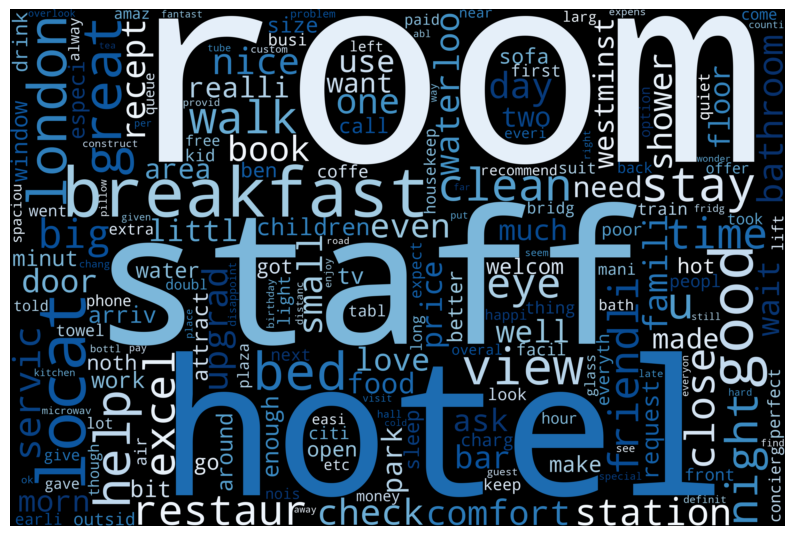

In [18]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in df['review']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

- World Cloud untuk klasifikasi Positif

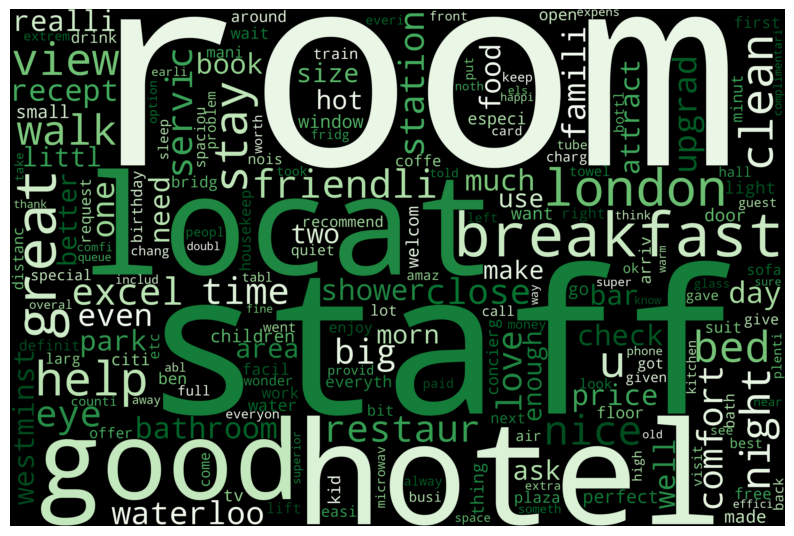

In [19]:
all_words = ' '.join([tweets for tweets in df.loc[df['klasifikasi'] == 'Positive', 'review']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Greens_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

- Word Cloud untuk klasifikasi negatif

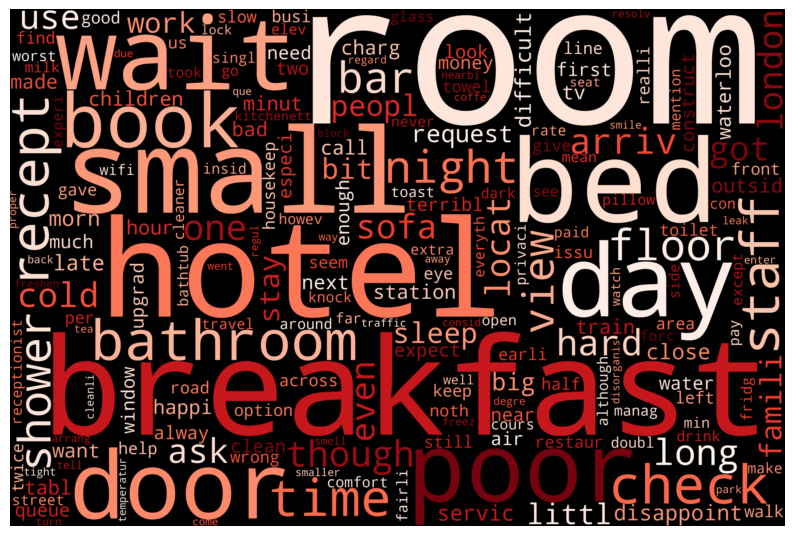

In [20]:
all_words = ' '.join([tweets for tweets in df.loc[df['klasifikasi'] == 'Negative', 'review']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Reds_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

- Word Cloud untuk klasifikasi netral

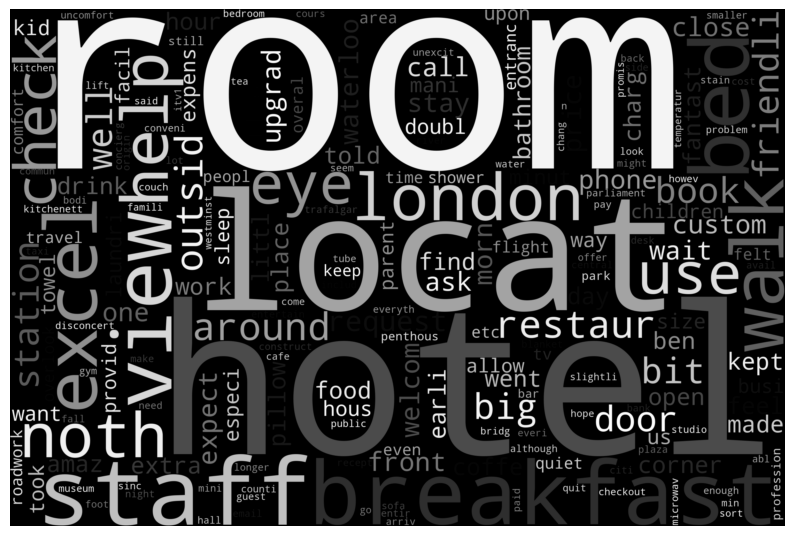

In [21]:
all_words = ' '.join([tweets for tweets in df.loc[df['klasifikasi'] == 'Netral', 'review']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Greys_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

- Grafik Distribusi Sentimen

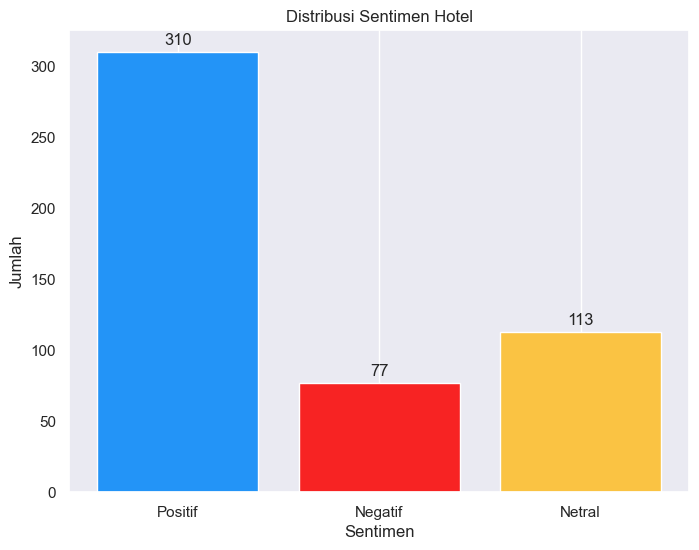

In [22]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [positive, negative, netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()

        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),  xytext=(0, 3),

                                   textcoords="offset points",
                                   ha='center', va='bottom')

    ax.grid(axis='y', linestyle='', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Hotel")

- Menghitung jumlah review berdasarkan klasifikasi dan kategori

In [23]:
jumlah_review_positif = df[df['klasifikasi'] == 'Positive'].groupby('category').size()
jumlah_review_negatif = df[df['klasifikasi'] == 'Negative'].groupby('category').size()

negatif_fasilitas = jumlah_review_negatif[0]
negatif_makanan = jumlah_review_negatif[1]
negatif_pelayanan = jumlah_review_negatif[2]

positif_fasilitas = jumlah_review_positif[0]
positif_makanan = jumlah_review_positif[1]
positif_pelayanan = jumlah_review_positif[2]

- Grafik Perbandingan Review Positif dan Negatif Berdasarkan Kategori

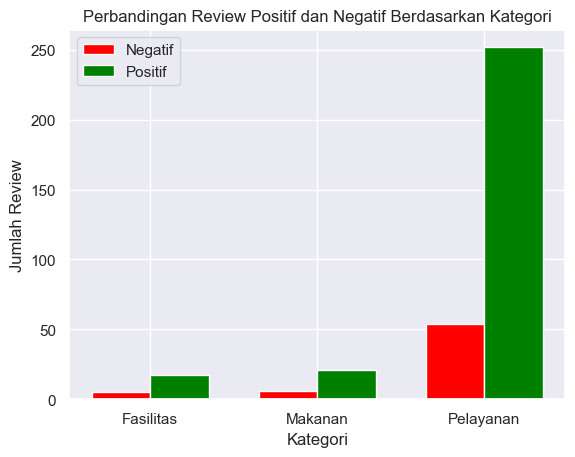

In [24]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Fasilitas', 'Makanan', 'Pelayanan']
negatif = [negatif_fasilitas, negatif_makanan, negatif_pelayanan]
positif = [positif_fasilitas, positif_makanan, positif_pelayanan]

x = np.arange(len(categories))

width = 0.35 

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, negatif, width, label='Negatif', color='red')
rects2 = ax.bar(x + width/2, positif, width, label='Positif', color='green')

ax.set_xlabel('Kategori')
ax.set_ylabel('Jumlah Review')
ax.set_title('Perbandingan Review Positif dan Negatif Berdasarkan Kategori')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

# ========================================================

# Analisis Sentimen menggunakan Naive Bayes

# ========================================================

- Menghapus fitur hotel_name, review_date, category 

In [25]:
dataset = df.drop(['hotel_name', 'review_date', 'category'], axis=1, inplace=False)
dataset

review klasifikasi
0    extra bed worst breakfast queue realli terribl...    Negative
1                                           locat view      Netral
2    around corner london eye use trafalgar trip pi...      Netral
3                                wish wheat free snack    Positive
4    alway hotel choic staff incred recent give won...    Positive
..                                                 ...         ...
495  arriv citi view consist train station next hot...    Positive
496                              penthous fantast view      Netral
497  carpet littl shabbi bathroom seen better day c...    Positive
498  staff excel mention book celebr mother 60th bi...    Positive
499  need recept staff work grasp understand custom...    Positive

[500 rows x 2 columns]

- Mengambil data latih secara acak

In [35]:
from sklearn.model_selection import train_test_split

X = dataset[['review']]
y = dataset[['klasifikasi']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.03, random_state = 7)

train_data = pd.concat([X_train, y_train], axis=1)
train_data = [tuple(x) for x in train_data.to_records(index=False)]

test_data =  pd.concat([X_test, y_test], axis=1)
test_data = [tuple(x) for x in test_data.to_records(index=False)]

- Perhitungan Akurasi

In [36]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_data)
print("Akurasi Test: ", cl.accuracy(test_data))

Akurasi Test:  0.9333333333333333


- Melakukan analisis sentimen menggunakan Naive Bayes

In [28]:
review_data = list(df['review'])
polaritas = 0
status = []
positive = negative = netral = total = 0

for i, review in enumerate(review_data):
    analysis = TextBlob(review, classifier=cl)

    if analysis.classify() == "Positive":
        positive += 1
    elif analysis.classify() == "Netral":
        netral += 1
    else:
        negative += 1

    status.append(analysis.classify())
    total +=1

print(f"Hasil analisis data:\nPositif = {positive}\nNetral = {netral}\nNegative = {negative}")
print(f"Total data : {total}")

Hasil analisis data:
Positif = 296
Netral = 143
Negative = 61
Total data : 500


In [29]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
df['klasifikasi_bayes'] = status

- Grafik Distribusi Sentimen

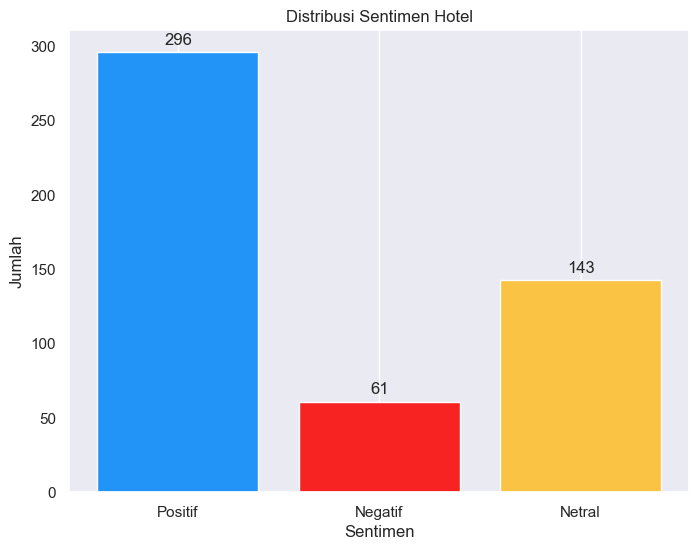

In [30]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [positive, negative, netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()

        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),  xytext=(0, 3),

                                   textcoords="offset points",
                                   ha='center', va='bottom')

    ax.grid(axis='y', linestyle='', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Hotel")

In [31]:
df.head()

review_date                     hotel_name  \
0    8/3/2017  Park Plaza County Hall London   
1    8/3/2017  Park Plaza County Hall London   
2    8/3/2017  Park Plaza County Hall London   
3    8/2/2017  Park Plaza County Hall London   
4    8/2/2017  Park Plaza County Hall London   

                                              review category klasifikasi  \
0  extra bed worst breakfast queue realli terribl...     Food    Negative   
1                                         locat view  Service      Netral   
2  around corner london eye use trafalgar trip pi...  Service      Netral   
3                              wish wheat free snack     Food    Positive   
4  alway hotel choic staff incred recent give won...  Service    Positive   

  klasifikasi_bayes  
0          Negative  
1            Netral  
2            Netral  
3          Positive  
4          Positive